In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'fleet-joy-357516' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=fleet-joy-357516:US:bquxjob_493c6786_1861bb6dd1d)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_493c6786_1861bb6dd1d') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
    name as Course_Name, COUNT(user_id) UserCOUNT   
FROM 
(#second enrollments 
SELECT * 
FROM 
(SELECT 
    user_id, enroll_date_v2, name, 
    DENSE_RANK () OVER ( 
			PARTITION BY user_id
			ORDER BY enroll_date_v2 DESC
		)course_rank 
FROM 
(SELECT 
   *   
FROM 
(SELECT *,CAST(enroll_date as DATE) enroll_date_v2 FROM `fleet-joy-357516.10MS.enroll` )enrollments

JOIN

(#Courses Latest Details 
SELECT *
FROM 
( SELECT *, CAST( launched_at as DATE) launched_at_v2 
 FROM  `fleet-joy-357516.10MS.courses` )Courses 
RIGHT JOIN 
(SELECT course_id, MAX(CAST( launched_at as DATE)) launched_at_v2
FROM  `fleet-joy-357516.10MS.courses`
GROUP BY 1)updated 
USING(course_id,launched_at_v2))CouseInfos 

USING(course_id)
WHERE verticle= 'Paid')Enrollmentinfos )t
WHERE course_rank = 2)ops 
GROUP BY 1 
ORDER BY 2 DESC 


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_493c6786_1861bb6dd1d') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,Course_Name,UserCOUNT
0,Microsoft Excel,285
1,Facebook & Email Marketing,251
2,ঘরে বসে Freelancing,240
3,সবার জন্য Vocabulary,224
4,২৪ ঘণ্টায় কোরআন শিখি,214
5,Microsoft PowerPoint,190
6,English Grammar Course,163
7,অর্থসহ নামাজ শিক্ষা,118
8,Kids' English,84
9,Web Design,79


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

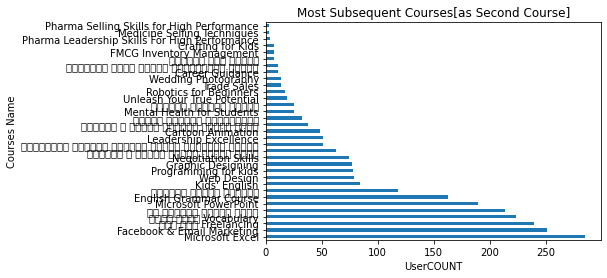

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#For Bengali font
plt.rcParams['font.sans-serif']=['Ananda Lipi'] #Show Bengali label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually

# Plot a bar chart using the DataFrame
results.plot(kind='barh', x='Course_Name', y='UserCOUNT', legend=False)

# Add labels and title to the chart
plt.xlabel("UserCOUNT")
plt.ylabel("Courses Name")
plt.title("Most Subsequent Courses[as Second Course]")

# Show the plot
plt.show()